In [33]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

plt.style.use('seaborn-darkgrid')
sns.set_context(
    "notebook",
    font_scale=1.5,
    rc={
        "axes.titlesize":18
    }
)

In [34]:
df=pd.read_csv("clean_rainfall.csv")
df.head()

,id,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Humidity,Prevalent_wind_direction
0,0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,High,NE
1,1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,High,SW
2,2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,High,W
3,3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,1415.9,High,E
4,4,ANDAMAN & NICOBAR ISLANDS,1905,19.0,0.0,3.3,26.9,85.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,High,S


In [35]:
sample_df=df[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL']]
sample_df.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
0,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2
1,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7
2,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4
3,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,1415.9
4,19.0,0.0,3.3,26.9,85.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7


# Normalization

In [36]:
normalized_df=(sample_df-sample_df.mean())/sample_df.std()
normalized_df.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
0,0.909013,1.887030,0.044400,-0.611821,3.677104,1.254131,0.068000,1.018366,1.025154,2.997789,7.682570,0.360106,2.213595
1,-0.573862,3.983780,-0.332649,-0.646384,2.991084,1.339671,-0.450434,2.483315,3.543287,1.038633,4.729476,3.461342,2.380405
2,-0.191088,3.528090,-0.603237,-0.631357,1.240780,1.090034,1.450872,0.188622,1.073463,0.874773,3.623548,5.037620,1.743359
3,-0.290549,-0.201067,-0.603237,2.395105,1.816473,1.156371,0.589099,-0.706684,4.707244,1.294665,3.983790,0.518956,0.000047
4,-0.001207,-0.625031,-0.530046,-0.242154,-0.000193,1.739440,0.081703,0.209043,0.756432,1.688954,-0.216067,7.962899,1.301508


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


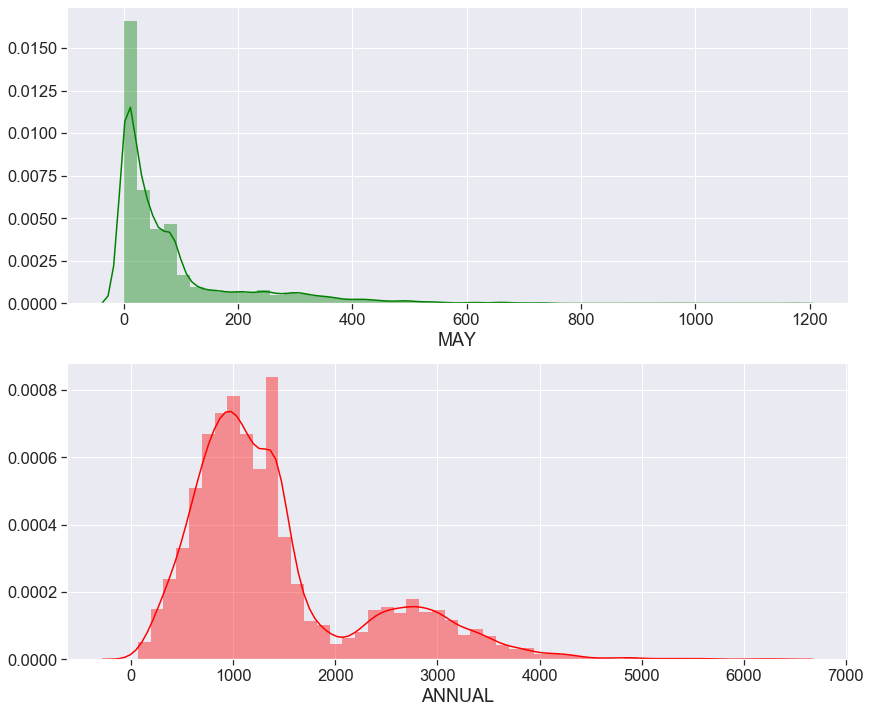

In [37]:
fig,ax = plt.subplots(2,1,figsize=(14,12))
sns.distplot(sample_df.MAY,color='green',ax=ax[0])
sns.distplot(sample_df.ANNUAL,color='red',ax=ax[1])
fig.show()

# Correlation

In [41]:
df = df.drop(['id','SUBDIVISION','YEAR'],axis=1)
df.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Humidity,Prevalent_wind_direction
0,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,High,NE
1,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,High,SW
2,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,High,W
3,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,1415.9,High,E
4,19.0,0.0,3.3,26.9,85.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,High,S


(13.5, -0.5)

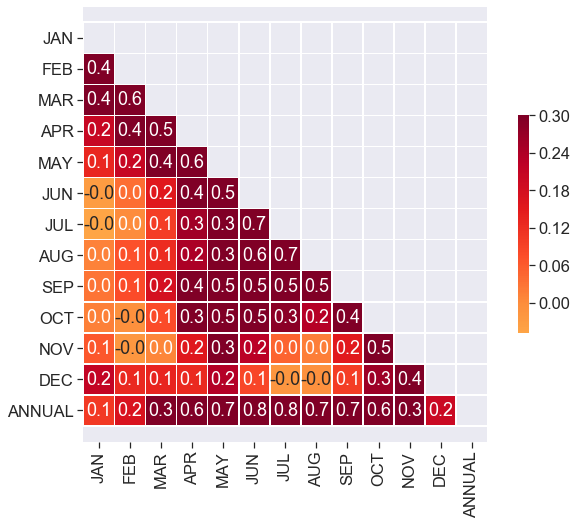

In [42]:
#Compute the correlation matrix
corr = df.corr(method='pearson')

#Generate a mask for upper triangle
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

#Set up matplotlib figure
f,ax=plt.subplots(figsize=(11,8))

#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,vmax=.3,center=0,annot=True,fmt='.1f',square=True,linewidths=.5,cbar_kws={"shrink":.5},cmap='YlOrRd')
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+.5,top-.5)